In [249]:
import pandas as pd
import os
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pylab as plt
from matplotlib import rc
from matplotlib.ticker import FixedLocator, FixedFormatter

plt.style.use(['science', 'no-latex'])
plt.rcParams['ps.useafm'] = True
plt.rcParams["savefig.dpi"] = "300"
fontdict = {
    'family': 'sans-serif',
    'sans-serif': ['Arial'],
    'weight': 'bold',
    'size': 14
}
rc('font', **fontdict)
plt.rcParams['mathtext.default'] = 'regular'
plt.rcParams['mathtext.rm'] = 'serif'
from cycler import cycler

plt.rcParams['axes.prop_cycle'] = cycler(
    color=['brown', 'teal', 'forestgreen', 'purple'])




In [250]:
from matplotlib.backends.backend_pdf import PdfPages

pdf = PdfPages('figures.pdf')


In [251]:
dir = "C:/Users/wangluhui/Documents/Works/Temporary/ecci-exps/5min/normal/"
# dir="C:/Users/wangluhui/Documents/Works/Temporary/ecci-experiments/results/"

import glob
import numpy as np
import pandas as pd
from tinydb import TinyDB,Query
import os
from functools import reduce
import copy

q=Query()

np.set_printoptions(precision=3)

results_dirs=glob.glob(dir+"*[0-9]*")

results = [
    # TinyDB(os.path.join(dir, "statistics.json")).search((
    #     (q.delay == "50ms") & (q.bandwidth == "20Mbps")) | (
    #         (q.delay == "0ms") & (q.bandwidth == "20Mbps")))
    TinyDB(os.path.join(dir, "statistics.json")).all()
    if os.path.exists(os.path.join(dir, "statistics.json")) else []
    for dir in results_dirs
]

results = reduce(lambda x, y: x.extend(y) or x, results)

len(results)
eil_statistics=[]
all_eils=[]
accuracy_statistics=[]
for result in results:
    statistics={}
    statistics['scenario'] = result['scenario']
    statistics['interval'] = result['interval']
    statistics['delay'] = result['delay']
    statistics['network']= result['bandwidth']+"|"+result['delay']
    eils=result['eils']
    arr = np.array(eils)
    statistics['count'] = len(arr)
    statistics['id'] = "-".join(
        [statistics['scenario'], statistics['network'], str(statistics['count'])])

    statistics['mean']=np.around(np.mean(arr),3)
    statistics['std']=np.around(np.std(arr),3)
    statistics['min']=np.around(np.min(arr),3)
    statistics['25%']=np.around(np.quantile(arr,.25),3)
    statistics['50%'] = np.around(np.quantile(arr, .5),3)
    statistics['75%'] = np.around(np.quantile(arr, .75),3)
    statistics['max']=np.around(np.max(arr))
    all_eils.extend([{
        'id': statistics['id'],
        'scenario': statistics['scenario'],
        'interval': statistics['interval'],
        'network': statistics['network'],
        'delay':statistics['delay'] ,
        'eil': eil
    } for eil in eils])
    statistics.pop('id')
    eil_statistics.append(statistics)
    statistics=copy.deepcopy(result)
    statistics.pop("bandwidth")
    statistics['network'] = result['bandwidth'] + "|" + result['delay']
    statistics["bandwidth_consumed"] = (10**(
        -6)) * statistics["bandwidth_consumed"]
    statistics.pop('eils')
    accuracy_statistics.append(statistics)


In [252]:
accuracy=pd.DataFrame(accuracy_statistics)
accuracy = accuracy[[
    "scenario",
    "interval",
    "network",
    "delay",
    "f1_score",
    "f2_score",
    "bandwidth_consumed",
    "tp",
    "fp",
    "tn",
    "fn",
    "precision",
    "recall",
    "total",
]]
accuracy=accuracy.rename(columns={
    "bandwidth_consumed": "bw (GB)"
})


In [253]:
pd.DataFrame(accuracy)

,scenario,interval,network,delay,f1_score,f2_score,bw (GB),tp,fp,tn,fn,precision,recall,total
0,CI,0.3,20Mbps|0ms,0ms,1.000000,1.000000,0.474731,1224,0,2982,0,1.000000,1.000000,4206
1,CI,0.3,20Mbps|50ms,50ms,1.000000,1.000000,0.474731,1224,0,2982,0,1.000000,1.000000,4206
2,EI,0.3,20Mbps|0ms,0ms,0.373541,0.276180,0.001420,288,30,2952,936,0.905660,0.235294,4206
3,EI,0.3,20Mbps|50ms,50ms,0.373541,0.276180,0.001422,288,30,2952,936,0.905660,0.235294,4206
4,ACE,0.3,20Mbps|0ms,0ms,0.827489,0.761487,0.090200,885,30,2952,339,0.967213,0.723039,4206
5,ACE,0.3,20Mbps|50ms,50ms,0.827489,0.761487,0.090209,885,30,2952,339,0.967213,0.723039,4206
6,ACE+,0.3,20Mbps|0ms,0ms,0.852429,0.794329,0.157024,930,28,2954,294,0.970772,0.759804,4206
7,ACE+,0.3,20Mbps|50ms,50ms,0.853211,0.794600,0.154367,930,26,2956,294,0.972803,0.759804,4206
8,CI,0.5,20Mbps|0ms,0ms,1.000000,1.000000,0.278481,726,0,1797,0,1.000000,1.000000,2523
9,CI,0.5,20Mbps|50ms,50ms,1.000000,1.000000,0.278480,726,0,1797,0,1.000000,1.000000,2523


In [254]:
pd.DataFrame(eil_statistics)

,scenario,interval,delay,network,count,mean,std,min,25%,50%,75%,max
0,CI,0.3,0ms,20Mbps|0ms,4206,0.165,0.242,0.003,0.077,0.115,0.167,3.0
1,CI,0.3,50ms,20Mbps|50ms,4206,0.243,0.148,0.038,0.150,0.208,0.294,1.0
2,EI,0.3,0ms,20Mbps|0ms,4206,0.396,0.661,0.087,0.175,0.254,0.414,8.0
3,EI,0.3,50ms,20Mbps|50ms,4206,0.297,0.184,0.096,0.173,0.245,0.382,3.0
4,ACE,0.3,0ms,20Mbps|0ms,4206,0.367,0.313,0.096,0.192,0.290,0.446,4.0
5,ACE,0.3,50ms,20Mbps|50ms,4206,0.341,0.197,0.100,0.189,0.288,0.439,2.0
6,ACE+,0.3,0ms,20Mbps|0ms,4206,0.299,0.202,0.021,0.162,0.248,0.393,2.0
7,ACE+,0.3,50ms,20Mbps|50ms,4206,0.319,0.177,0.054,0.184,0.272,0.415,2.0
8,CI,0.5,0ms,20Mbps|0ms,2523,0.119,0.078,-0.012,0.072,0.105,0.147,1.0
9,CI,0.5,50ms,20Mbps|50ms,2523,0.250,0.122,0.069,0.165,0.222,0.306,1.0


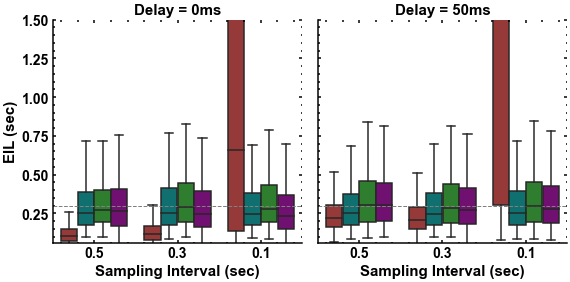

In [255]:
g = sns.catplot(x="interval",
                y='eil',
                data=pd.DataFrame(all_eils),
                hue='scenario',
                order=[0.5, 0.3, 0.1],
                col_order=[
                    "0ms",
                    "50ms",
                ],
                col='delay',
                fliersize=0,
                linewidth=1.5,
                kind='box',
                hue_order=["CI", "EI", "ACE", "ACE+"],
                legend=False,
                height=4,
                aspect=1)
g.set_titles(col_template="Delay = {col_name}")
(g.set_axis_labels("Sampling Interval (sec)", "EIL (sec)"))
# g._legend.set_title("Scenrio")

for ax in g.axes.flatten():
    ax.tick_params(axis='x', which="both", width=1.5)
    ax.tick_params(axis='y', which="both", width=1.5)
    ax.spines['left'].set_linewidth(1.5)
    ax.spines['right'].set_linewidth(1.5)
    ax.spines['top'].set_linewidth(1.5)
    ax.spines['bottom'].set_linewidth(1.5)
    ax.set_ylabel(ax.get_ylabel(), fontweight="bold", fontsize="15")
    ax.set_xlabel(ax.get_xlabel(), fontweight="bold", fontsize="15")
    ax.set_title(ax.get_title(), fontweight="bold", fontsize="15")
    # ax.set_yscale('log')
    ax.set_ylim(0.06,1.5)
    ax.axhline(y=0.3, linewidth=1, color='grey', linestyle='--')
pdf.savefig(g.fig)

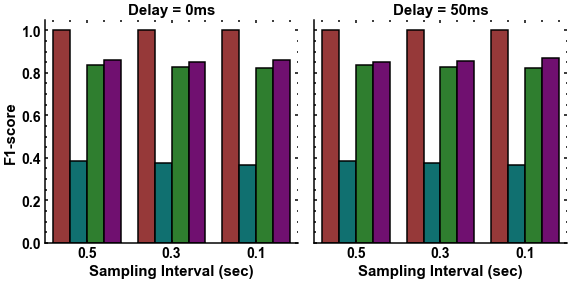

In [256]:
g = sns.catplot(
    x="interval",
    y='f1_score',
    data=pd.DataFrame(accuracy_statistics),
    # hue='policy',
    hue='scenario',
    order=[0.5, 0.3, 0.1],
    col_order=[
        "0ms",
        "50ms",
    ],
    col='delay',
    linewidth=1.5,
    kind='bar',
    edgecolor='black',
    hue_order=["CI", "EI", "ACE", "ACE+"],
    legend=False,
    height=4,
    aspect=1)
g.set_titles(col_template="Delay = {col_name}")
(g.set_axis_labels("Sampling Interval (sec)",
                   "F1-score"))
# g._legend.set_title("Scenrio")

for ax in g.axes.flatten():
    ax.tick_params(axis='x', which="both", width=1.5)
    ax.tick_params(axis='y', which="both", width=1.5)
    ax.spines['left'].set_linewidth(1.5)
    ax.spines['right'].set_linewidth(1.5)
    ax.spines['top'].set_linewidth(1.5)
    ax.spines['bottom'].set_linewidth(1.5)
    ax.set_ylabel(ax.get_ylabel(), fontweight="bold", fontsize="15")
    ax.set_xlabel(ax.get_xlabel(), fontweight="bold", fontsize="15")
    ax.set_title(ax.get_title(),fontweight="bold", fontsize="15")
# g.add_legend(loc="center right")
# g._legend.set_title("Scenrio")
pdf.savefig(g.fig)

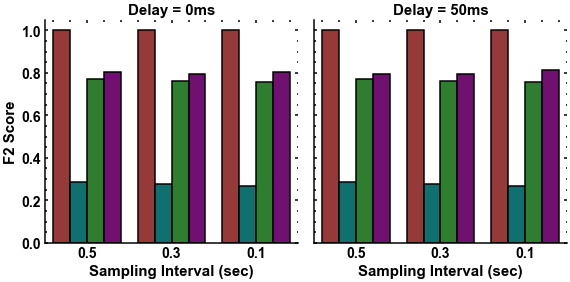

In [257]:
g = sns.catplot(x="interval",
                y='f2_score',
                data=pd.DataFrame(accuracy_statistics),
                hue='scenario',
                order=[0.5, 0.3, 0.1],
                col_order=[
                    "0ms",
                    "50ms",
                ],
                col='delay',
                linewidth=1.5,
                kind='bar',
                edgecolor='black',
                hue_order=["CI", "EI", "ACE", "ACE+"],
                legend=False,
                height=4,
                aspect=1)
g.set_titles(col_template="Delay = {col_name}")
(g.set_axis_labels("Sampling Interval (sec)",
                   "F2 Score"))
# g._legend.set_title("Scenrio")

for ax in g.axes.flatten():
    ax.tick_params(axis='x', which="both", width=1.5)
    ax.tick_params(axis='y', which="both", width=1.5)
    ax.spines['left'].set_linewidth(1.5)
    ax.spines['right'].set_linewidth(1.5)
    ax.spines['top'].set_linewidth(1.5)
    ax.spines['bottom'].set_linewidth(1.5)
    ax.set_ylabel(ax.get_ylabel(), fontweight="bold", fontsize="15")
    ax.set_xlabel(ax.get_xlabel(), fontweight="bold", fontsize="15")
    ax.set_title(ax.get_title(), fontweight="bold", fontsize="15")
pdf.savefig(g.fig)

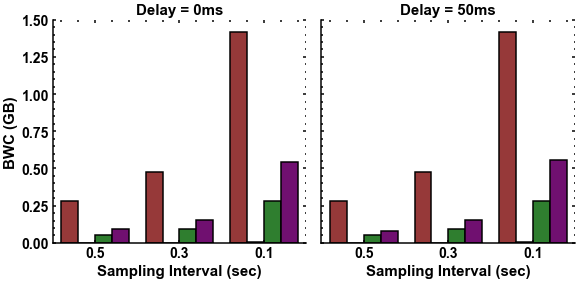

In [258]:
g = sns.catplot(x="interval",
                y='bandwidth_consumed',
                data=pd.DataFrame(accuracy_statistics),
                hue='scenario',
                order=[0.5, 0.3, 0.1],
                col_order=[
                    "0ms",
                    "50ms",
                ],
                col='delay',
                linewidth=1.5,
                kind='bar',
                edgecolor='black',
                hue_order=["CI", "EI", "ACE", "ACE+"],
                legend=False,
                height=4,
                aspect=1)
g.set_titles(col_template="Delay = {col_name}")
(g.set_axis_labels("Sampling Interval (sec)", "BWC (GB)"))
# g._legend.set_title("Scenrio")

for ax in g.axes.flatten():
    ax.tick_params(axis='x', which="both", width=1.5)
    ax.tick_params(axis='y', which="both", width=1.5)
    ax.spines['left'].set_linewidth(1.5)
    ax.spines['right'].set_linewidth(1.5)
    ax.spines['top'].set_linewidth(1.5)
    ax.spines['bottom'].set_linewidth(1.5)
    ax.set_ylabel(ax.get_ylabel(),fontweight="bold", fontsize="15")
    ax.set_xlabel(ax.get_xlabel(), fontweight="bold", fontsize="15")
    ax.set_title(ax.get_title(),fontweight="bold", fontsize="15")
    # ax.set_yscale('log')
    ax.set_ylim(0,1.5)
pdf.savefig(g.fig)

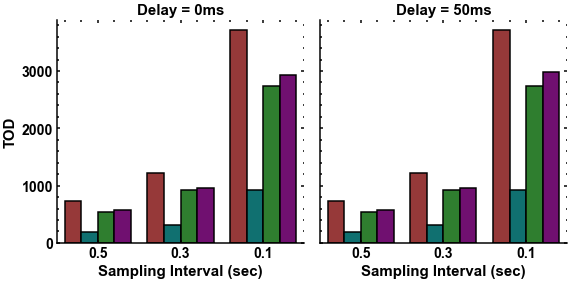

In [259]:
g = sns.catplot(x="interval",
                y='tod',
                data=pd.DataFrame(accuracy_statistics),
                hue='scenario',
                order=[0.5, 0.3, 0.1],
                col_order=[
                    "0ms",
                    "50ms",
                ],
                col='delay',
                linewidth=1.5,
                kind='bar',
                edgecolor='black',
                hue_order=["CI", "EI", "ACE", "ACE+"],
                legend=False,
                height=4,
                aspect=1)
g.set_titles(col_template="Delay = {col_name}")
(g.set_axis_labels("Sampling Interval (sec)", "TOD"))
# g._legend.set_title("Scenrio")

for ax in g.axes.flatten():
    ax.tick_params(axis='x', which="both", width=1.5)
    ax.tick_params(axis='y', which="both", width=1.5)
    ax.spines['left'].set_linewidth(1.5)
    ax.spines['right'].set_linewidth(1.5)
    ax.spines['top'].set_linewidth(1.5)
    ax.spines['bottom'].set_linewidth(1.5)
    ax.set_ylabel(ax.get_ylabel(), fontweight="bold", fontsize="15")
    ax.set_xlabel(ax.get_xlabel(), fontweight="bold", fontsize="15")
    ax.set_title(ax.get_title(), fontweight="bold", fontsize="15")
pdf.savefig(g.fig)

In [260]:
pdf.close()

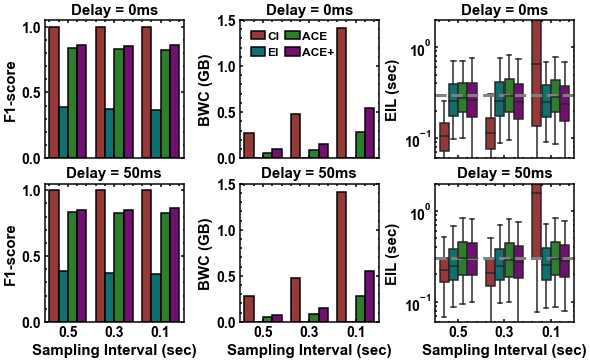

In [261]:
def plot():
    fig, axes = plt.subplots(2,
                             3,
                             gridspec_kw={'width_ratios': [1, 1, 1]},
                             sharex=True,
                             sharey=False,
                             figsize=(8, 5))


    g1 = sns.barplot(x="interval",
                    y='f1_score',
                    data=pd.DataFrame(accuracy_statistics).query('delay=="0ms"'),
                    hue='scenario',
                    edgecolor='black',
                    order=[0.5, 0.3, 0.1],
                    linewidth=1.5,
                    hue_order=["CI", "EI", "ACE", "ACE+"],
                    ax=axes[0,0])
    g1.get_legend().set_visible(False)
    g1.tick_params(axis='x', which="both", width=1.5)
    g1.tick_params(axis='y', which="both", width=1.5)
    g1.spines['left'].set_linewidth(1.5)
    g1.spines['right'].set_linewidth(1.5)
    g1.spines['top'].set_linewidth(1.5)
    g1.spines['bottom'].set_linewidth(1.5)
    g1.set_title("Delay = 0ms", fontweight="bold", fontsize="15")
    g1.set_xlabel('')
    g1.set_ylabel('F1-score', fontweight="bold", fontsize="15")

    g2 = sns.barplot(x="interval",
                    y='f1_score',
                    data=pd.DataFrame(accuracy_statistics).query('delay=="50ms"'),
                    hue='scenario',
                    edgecolor='black',
                    order=[0.5, 0.3, 0.1],
                    linewidth=1.5,
                    hue_order=["CI", "EI", "ACE", "ACE+"],
                    ax=axes[1,0])
    g2.get_legend().set_visible(False)
    g2.tick_params(axis='x', which="both", width=1.5)
    g2.tick_params(axis='y', which="both", width=1.5)
    g2.spines['left'].set_linewidth(1.5)
    g2.spines['right'].set_linewidth(1.5)
    g2.spines['top'].set_linewidth(1.5)
    g2.spines['bottom'].set_linewidth(1.5)
    g2.set_title("Delay = 50ms", fontweight="bold", fontsize="15")
    g2.set_xlabel('Sampling Interval (sec)', fontweight="bold", fontsize="15")
    g2.set_ylabel('F1-score', fontweight="bold", fontsize="15")

    g3 = sns.barplot(x="interval",
                 y='bandwidth_consumed',
                 data=pd.DataFrame(accuracy_statistics).query('delay=="0ms"'),
                 hue='scenario',
                 edgecolor='black',
                 order=[0.5, 0.3, 0.1],
                 linewidth=1.5,
                 hue_order=["CI", "EI", "ACE", "ACE+"],
                 ax=axes[0,1])
    g3.get_legend().set_visible(False)
    g3.tick_params(axis='x', which="both", width=1.5)
    g3.tick_params(axis='y', which="both", width=1.5)
    g3.spines['left'].set_linewidth(1.5)
    g3.spines['right'].set_linewidth(1.5)
    g3.spines['top'].set_linewidth(1.5)
    g3.spines['bottom'].set_linewidth(1.5)
    g3.set_title("Delay = 0ms", fontweight="bold", fontsize="15")
    g3.set_xlabel('')
    g3.set_ylabel('BWC (GB)', fontweight="bold", fontsize="15")
    g3.legend(
        loc="upper left",
        fontsize='12',
        handlelength=1.2,
        ncol=2,
        frameon=False,
        columnspacing=0.5,
        handletextpad=0.2,
    )
    g3.set_ylim(0,1.5)

    g4 = sns.barplot(x="interval",
                    y='bandwidth_consumed',
                    data=pd.DataFrame(accuracy_statistics).query('delay=="50ms"'),
                    hue='scenario',
                    edgecolor='black',
                    order=[0.5, 0.3, 0.1],
                    linewidth=1.5,
                    hue_order=["CI", "EI", "ACE", "ACE+"],
                    ax=axes[1,1])
    g4.get_legend().set_visible(False)
    g4.tick_params(axis='x', which="both", width=1.5)
    g4.tick_params(axis='y', which="both", width=1.5)
    g4.spines['left'].set_linewidth(1.5)
    g4.spines['right'].set_linewidth(1.5)
    g4.spines['top'].set_linewidth(1.5)
    g4.spines['bottom'].set_linewidth(1.5)
    g4.set_title("Delay = 50ms", fontweight="bold", fontsize="15")
    g4.set_xlabel('Sampling Interval (sec)', fontweight="bold", fontsize="15")
    g4.set_ylabel('BWC (GB)', fontweight="bold", fontsize="15")
    g4.set_ylim(0,1.5)

    g5 = sns.boxplot(x="interval",
                    y='eil',
                    data=pd.DataFrame(all_eils).query('delay=="0ms"'),
                    hue='scenario',
                    order=[0.5, 0.3, 0.1],
                    fliersize=0,
                    linewidth=1.5,
                    hue_order=["CI", "EI", "ACE", "ACE+"],
                    ax=axes[0,2])
    g5.get_legend().set_visible(False)

    g5.tick_params(axis='x', which="both", width=1.5)
    g5.tick_params(axis='y', which="both", width=1.5)
    g5.spines['left'].set_linewidth(1.5)
    g5.spines['right'].set_linewidth(1.5)
    g5.spines['top'].set_linewidth(1.5)
    g5.spines['bottom'].set_linewidth(1.5)
    g5.set_title("Delay = 0ms", fontweight="bold", fontsize="15")
    g5.set_xlabel('')
    g5.set_ylabel('EIL (sec)', fontweight="bold", fontsize="15")
    g5.set_yscale('log')
    g5.axhline(y=0.3, linewidth=3, color='grey', linestyle='--')
    g5.set_ylim(0.06,2)

    g6 = sns.boxplot(x="interval",
                y='eil',
                data=pd.DataFrame(all_eils).query('delay=="50ms"'),
                hue='scenario',
                order=[0.5, 0.3, 0.1],
                fliersize=0,
                linewidth=1.5,
                hue_order=["CI", "EI", "ACE", "ACE+"],
                ax=axes[1,2])
    g6.get_legend().set_visible(False)

    g6.tick_params(axis='x', which="both", width=1.5)
    g6.tick_params(axis='y', which="both", width=1.5)
    g6.spines['left'].set_linewidth(1.5)
    g6.spines['right'].set_linewidth(1.5)
    g6.spines['top'].set_linewidth(1.5)
    g6.spines['bottom'].set_linewidth(1.5)
    g6.set_title("Delay = 50ms", fontweight="bold", fontsize="15")
    g6.set_xlabel('Sampling Interval (sec)', fontweight="bold", fontsize="15")
    g6.set_ylabel('EIL (sec)', fontweight="bold", fontsize="15")
    g6.set_yscale('log')
    g6.axhline(y=0.3, linewidth=3, color='grey', linestyle='--')
    g6.set_ylim(0.06,2)

    # plt.subplots_adjust(wspace =0.5, hspace =0.3)#调整子图间距
    fig.tight_layout(pad=0.2, w_pad=0.5, h_pad=0)  #调整整体空白
    return fig, axes


fig, axes = plot()
fig.savefig('results.pdf')
fig.savefig('results.png')
# plt.show()